In [1]:
# from sklearn import datasets
# #Iris e Wine dataset
# iris = datasets.load_iris()
# X = iris.data[:, :4]
# y = iris.target
import math
import random
import matplotlib.pyplot as plt

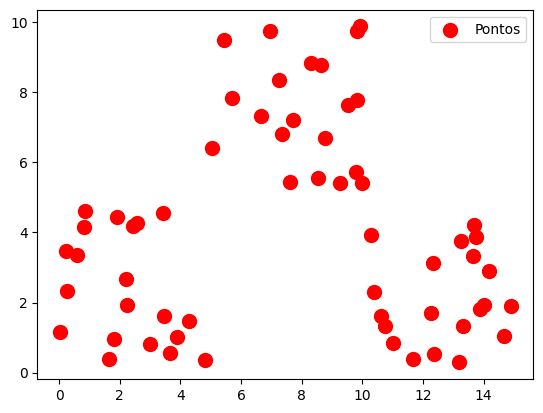

In [355]:
testeX = list()
testeY = list()
gteste = list()
for i in range(20):  
  num = random.uniform(0,5)
  testeX.append(num)
  num = random.uniform(0,5)
  testeY.append(num)
  gteste.append(0)
  num = random.uniform(5,10)
  testeX.append(num)
  num = random.uniform(5,10)
  testeY.append(num)
  gteste.append(1)
  num = random.uniform(10,15)
  testeX.append(num)
  num = random.uniform(0,5)
  testeY.append(num)
  gteste.append(2)
plt.scatter(testeX, testeY, label = 'Pontos', color = 'r', marker = 'o', s = 100)
plt.legend()
plt.show()
X = []
y = []
for x in range(len(testeX)):
  X.append([testeX[x],testeY[x]])
  y.append(gteste[x])

In [356]:
def distancia(classi, amostra):
    maior = float('-inf')
    classe = 0
    tam = []
    somatorio = 0
    for y in range(len(classi)):
        dista=0
        for z in range(len(amostra)):
            dista+=(amostra[z]+classi[y][z])**2
        dista = dista**0.5
        somatorio+=dista
        tam.append(dista)
    for y in range(len(classi)):
        dista = math.pow(tam[y],-1/2)/math.pow(somatorio,-1/2)
        if(dista>maior):
            maior = dista
            classe = y
    return classe

In [357]:
pertencimento = []
centros = [X[0]]
print(X[0])
nomeCentro = [y[0]]
centrolAtual = 0
pertencimento.append(0)
for x in range(1,int(len(X))):
    classe = distancia(centros,X[x])
    try:
        pertencimento.append(nomeCentro.index(y[x]))
        centrolAtual = nomeCentro.index(y[x])
    except:
        centros.append(X[x])
        nomeCentro.append(y[x])
        pertencimento.append(max(pertencimento)+1)
        centrolAtual = max(pertencimento)
    for k in range(len(centros[centrolAtual])):
        centros[centrolAtual][k] = ((centros[centrolAtual][k]*(pertencimento.count(centrolAtual)-1))+X[x][k])/pertencimento.count(centrolAtual)

[2.1875856957409114, 2.680310747409736]


In [358]:
print(centros)

[[2.2024392464145857, 2.4184891087482083], [8.106325226810814, 7.5060205684883865], [12.704342182194596, 2.1115202987020587]]


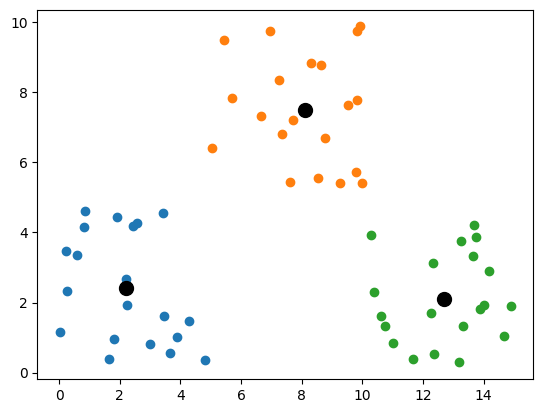

In [359]:
pontos = [[[],[]],[[],[]],[[],[]]]
for x in range(len(pertencimento)):
    if nomeCentro[pertencimento[x]] == 0:
        pontos[0][0].append(testeX[x])
        pontos[0][1].append(testeY[x])
    elif nomeCentro[pertencimento[x]] == 1:
        pontos[1][0].append(testeX[x])
        pontos[1][1].append(testeY[x])
    elif nomeCentro[pertencimento[x]] == 2:
        pontos[2][0].append(testeX[x])
        pontos[2][1].append(testeY[x])
plt.scatter(pontos[0][0],pontos[0][1])
plt.scatter(pontos[1][0],pontos[1][1])
plt.scatter(pontos[2][0],pontos[2][1])  
for x in centros:
    plt.scatter(x[0],x[1], label = 'Pontos', color = 'black', marker = 'o', s = 100)    
plt.show()